# Curso Análisis de Redes

## Cátedra Teoría de las Telecomunicaciones - Universidad ORT Uruguay



# Cadenas de Markov de Tiempo Continuo

In [1]:
#using Pkg;Pkg.instantiate()

## Repaso de probabilidad: distribuciones continuas

Una variable aleatoria $X$ se dice *absolutamente continua* si su distribución de probabilidad está caracterizada por una *densidad* (pdf) $f_X$ que verifica:

$$P(X\in(a,b]) = \int_a^b f_X(x)dx$$

para todo intervalo $(a,b]$.

En particular, su función de distribición acumulada cdf está dada por:

$$F_X(t) = P(X\leqslant t) = \int_{-\infty}^t f_X(x)dx.$$

### Propiedades

* La función $f_X$ es no negativa a integra a $1$ en todo $\mathbb{R}$.
* $F_X(t)$ es continua, en particular la probabilidad de cada punto individual es $0$.
* La densidad es la derivada (en casi todo punto) de $F_X$.
* La *esperanza* de una variable continua se calcula como:
$$E[X] = \int_{-\infty}^\infty x f_X(x) dx.$$

* En general, la esperanza de una función cualquiera $g(X)$ se calcula como:
$$E[X] = \int_{-\infty}^\infty g(x) f_X(x) dx.$$
siempre que la integral exista

### Ejemplo: la distribución exponencial

> **Definición:** Decimos que $X$ tiene distribución exponencial de parámetro $\lambda$ ($X\sim \exp(\lambda)$) si su densidad es:
>
> $$f_X(x) = \lambda e^{-\lambda x} \quad x\geqslant 0,$$
>
>y $0$ en otro caso.

**Propiedades:**

* $F_X(x) = 1-e^{-\lambda x}$.
* $E[X] = \frac{1}{\lambda}$.
* $\textrm{Var}[X] = \frac{1}{\lambda^2}$.

Para construirla en Julia podemos usar el paquete `Distributions`. Hay que recordar que en este caso para construirla se pasa la media $\theta = 1/\lambda$ y no el parámetro $\lambda$.

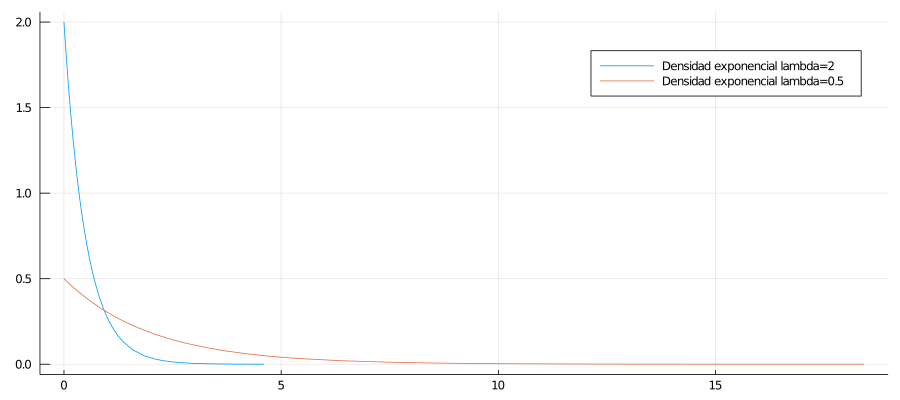

In [2]:
using Distributions, Plots
default(size=(900,400))

lambda = 2.0
d1=Exponential(1/lambda)

plot(d1, label="Densidad exponencial lambda=2")

lambda = 0.5
d2=Exponential(1/lambda)
plot!(d2, label="Densidad exponencial lambda=0.5")


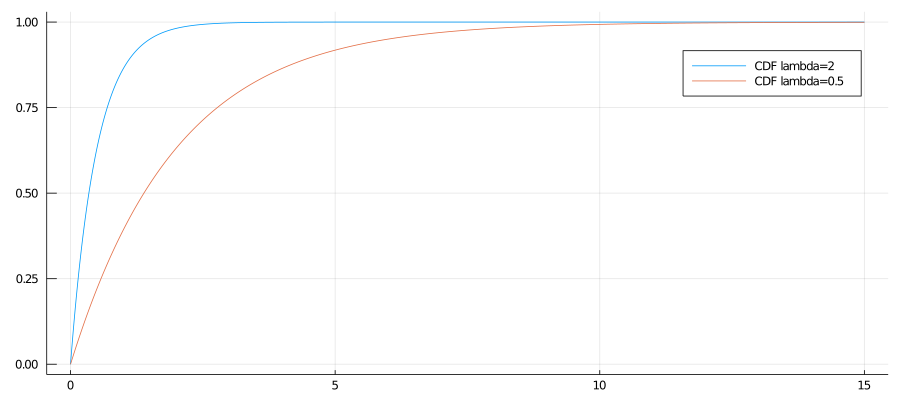

In [3]:
x=(0:0.01:15)

plot(x,cdf.(d1,x),label="CDF lambda=2")
plot!(x,cdf.(d2,x),label="CDF lambda=0.5")

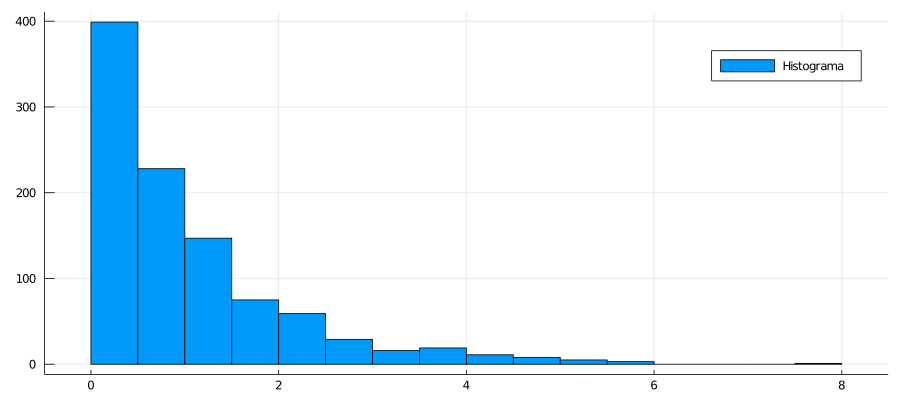

In [4]:
using StatsBase
##Sorteo n variables exponenciales
lambda=1.0
d=Exponential(1/lambda)

n=1000
X=rand(d,1000)

hist=fit(Histogram,X,nbins=30)
plot(hist, label="Histograma")

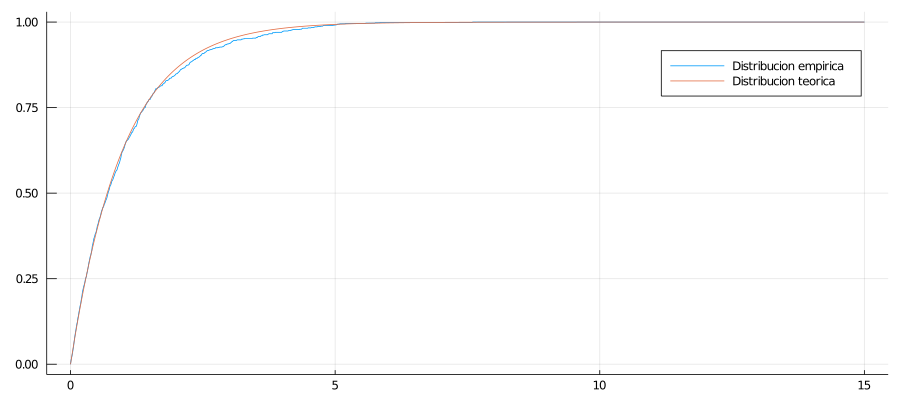

In [5]:
F=ecdf(X)

plot(x,F.(x), label="Distribucion empirica")
plot!(x,cdf.(d,x), label="Distribucion teorica")

### Distribución exponencial como límite de geométricas

Supongamos que $X_k$ tiene distribución $Geo(p_k)$, es decir:

$$P(X_k = j) = (1-p_k)^{j-1}p_k$$

Consideremos la variable $Y_k = X_k/k$ (aceleramos el tiempo) y supongamos que $p_k \to \lambda/k$ (achicamos la probabilidad).

**Observación:**

Notemos que $E[Y_k] = \frac{1}{k}E[X_k] = \frac{1}{kp_k} = \frac{1}{\lambda}$ por lo que la media de $Y_k$ es siempre la misma.

┌ Info: Saved animation to 
│   fn = /home/andres/Docencia/Analisis de Redes/notebooks/tmp.gif
└ @ Plots /home/andres/.julia/packages/Plots/8GUYs/src/animation.jl:102


Plots.AnimatedGif("/home/andres/Docencia/Analisis de Redes/notebooks/tmp.gif")
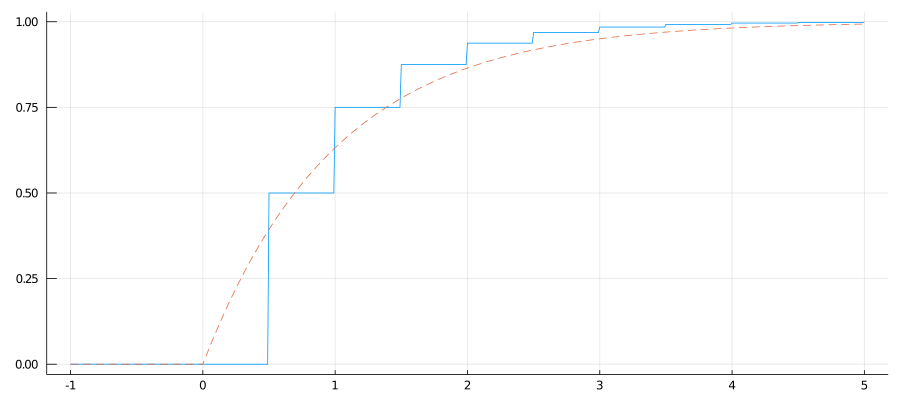

In [44]:
lambda=1.0
d=Exponential(1/lambda)
y=-1:0.01:5

anim = @animate for k=2:100
    pk = lambda/k
    dk = Geometric(pk)
    plot(y,cdf.(dk,k*y.-1), legend=:none)
    plot!(y,cdf.(d,y), linestyle=:dash)
end

gif(anim, fps=10)

Calculemos la siguiente probabilidad:

$$P(Y_k>t) = P(X_k>kt) = \sum_{j=\lceil kt \rceil} p_k(1-p_k)^{j-1} = (1-p_k)^{\lceil kt \rceil-1}$$

Como $p_k kt \to \lambda t$, entonces, aplicando el límite tipo $0^\infty$:

$$P(Y_k>t) \to_k e^{-\lambda t}$$

Es decir, cuando $k\to \infty$, las geométricas (reescaladas) se aproximan a la exponencial.

**Interpretación:** la v.a. exponencial mide algo que ocurre "al azar" con tasa o frecuencia $\lambda$ (es decir, en promedio cada $1/\lambda$).

### Mínimo de dos o más exponenciales

Sean $X_1 \sim \exp(\lambda_1)$ y $X_2 \sim \exp(\lambda_2)$ dos v.a. exponenciales independientes. Sea $X=\min\{X_1,X_2\}$ la v.a. que indica cuál de las exponenciales "ocurre antes". Entonces:

$$P(X>t) = P(\min\{X_1,X_2\}>t) = P(X_1>t, X_2>t) = e^{-\lambda_1 t} e^{-\lambda_2 t} = e^{-(\lambda_1+\lambda_2)t}.$$

Es decir, $X\sim \exp(\lambda_1+\lambda_2)$.

**Interpretación:** si dos cosas ocurren "al azar" y de manera independiente, con frecuencia $\lambda_1$ y $\lambda_2$, entonces el tiempo en que ocurre "una cualquiera de ellas" también es "al azar" y con frecuencia $\lambda_1+\lambda_2$. 

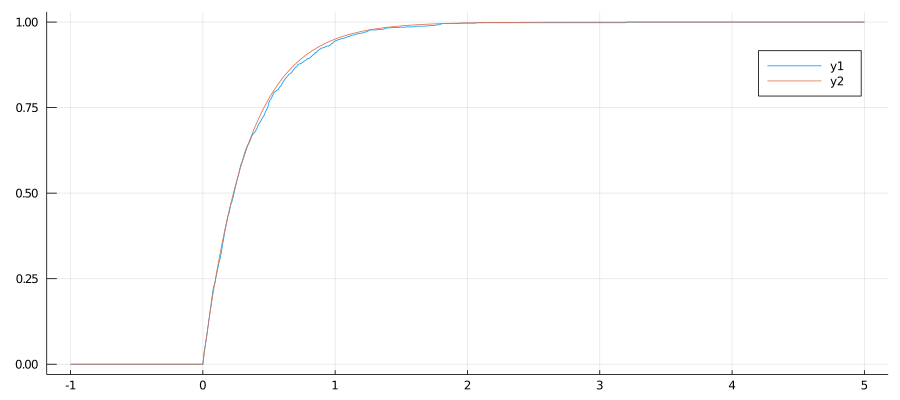

In [53]:
lambda1 =1.0
lambda2 = 2.0

lambda = lambda1+lambda2

d1 = Exponential(1/lambda1)
d2 = Exponential(1/lambda2)

X1 = rand(d1,1000)
X2 = rand(d2,1000)

X=min.(X1,X2)

plot(x,ecdf(X).(x))
plot!(x,cdf.(Exponential(1/lambda),x))

### Pérdida de memoria de la exponencial

Supongamos que $X\sim \exp(\lambda)$ y sabemos que ocurre el evento $\{X>s\}$, ¿cómo afecta esto el resultado?

Calculemos:

$$P(X>t+s \mid X>s) = \frac{P(X>t+s,X>s)}{P(X>s)} = \frac{P(X>t+s)}{P(X>s)} = \frac{e^{-\lambda(t+s)}}{e^{-\lambda s}} = e^{-\lambda t}.$$

**Interpretación:** si sabemos que un evento exponencial ocurre luego de tiempo $s$, entonces su distribución a partir de allí sigue siendo *exponencial con el mismo parámetro* (no envejece).

Esta propiedad se denomina **pérdida de memoria** de la distribución exponencial, y es la única distribución que lo cumple.

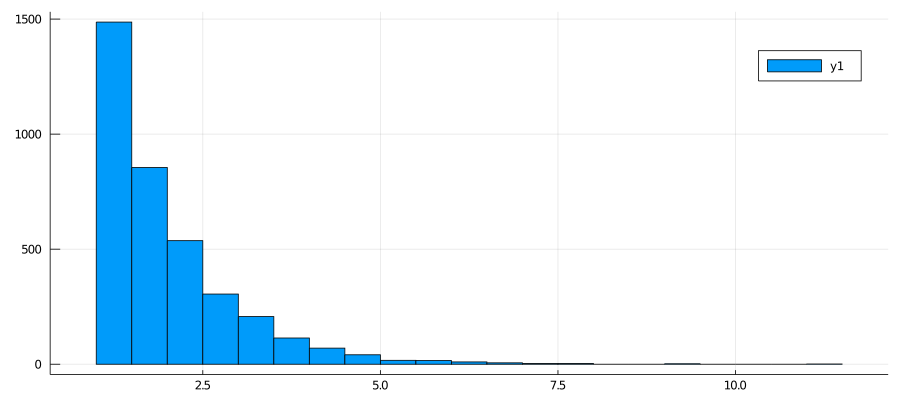

In [8]:
lambda=1.0
d=Exponential(1/lambda)

n=10000
s=1.0


X=rand(d,n)

Y = X[X.>s]

hist=fit(Histogram,Y, nbins=30)
plot(hist, legend=:mone)

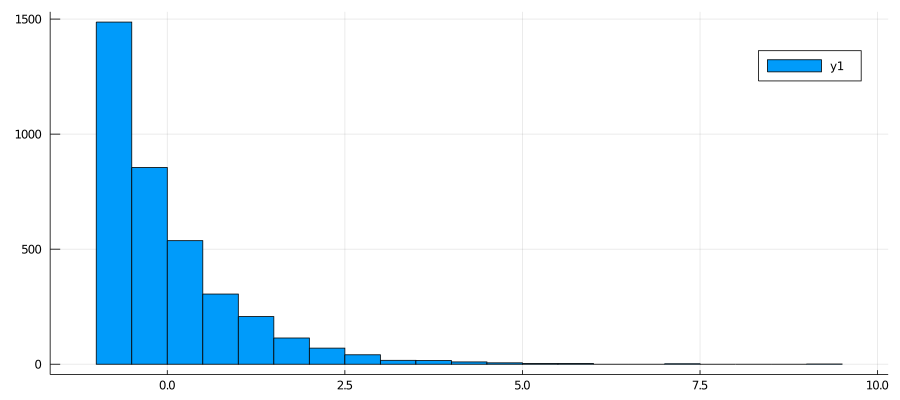

In [10]:
Y=Y .-s

hist=fit(Histogram,Y, nbins=30)
plot(hist, legend=:mone)

## Cadenas de Markov de Tiempo Continuo

**Idea:** construir un proceso estoástico de *tiempo continuo* que emule el comportamiento que ya vimos en tiempo discreto (estados discretos, pasado independiente del futuro dado el presente, etc.)

### Definición:

Consideremos un proceso estocástico $\{X(t)\}$ de tiempo *continuo* (es decir, una función aleatoria del tiempo) que toma valores en un *espacio de estados*:

$$ E= \{i,j,\ldots\}$$

discreto (finito o numerable).


> **Definición:** El proceso $\{X(t)\}$ es una *Cadena de Markov de Tiempo Continuo (CMTC)* si se
verifica la *propiedad de Markov* en tiempo continuo:
>
$$P(X(t+h) = j \mid X(t) = i, X(s) s\in[0,t]) = P(X(t+h) = j \mid X(t) = i) = p_{ij}(h).$$

para todo $i,j\in E$ y para todo $t,h$ reales positivos.

### Trayectoria de una CMTC

Las trayectorias tienen la forma siguiente:

![Trayectoria](images/trayectoria.png)

### Semigrupo de transición

* A las probabilidades $p_{ij}(h)$ se les denomina *probabilidades de transición en tiempo $h$* y a la matriz $P(h)=(p_{ij}(h))$ *matriz de transición* en tiempo $h$ de la cadena.

* Notar que estas probabilidades dependen del tiempo que pasa. Si $h\to 0$ entonces $P(h)\to Id$ (la cadena se mueve poco).

* La familia $P(h)$ se denomina *semigrupo de transición* y juega el rol de las matrices $P^n$ de tiempo discreto (donde $n$ era cantidad de pasos).


**Pregunta:** ¿quién es el equivalente a la matriz $P$ de tiempo discreto?

### Propiedad de semigrupo (Chapman-Kolmogorov)

Consideremos la probabilidad de ir de $i$ a $j$ en tiempo $s+t$:

$$p_{ij}(s+t) = P(X(s+t)=j \mid X(0)=i).$$

Condicionemos a pasar por un estado intermedio $k$:

$$\begin{align}
p_{ij}(s+t) &= P(X(s+t)=j \mid X(0)=i) = \sum_{k\in E} P(X(s+t)=j, X(s)=k \mid X(0)=i) \\
&= \sum_{k\in E} P(X(s+t)=j \mid X(s)=k ,X(0)=i) P(X(s)=k \mid X(0)=i) \\
&= \sum_{k\in E} p_{ik}(s) p_{kj} (t) \\
\end{align}$$

Nuevamente nos aparece un producto de matrices como en el caso discreto. Esto son las *Ecuaciones de Chapman Kolmogorov* en el caso continuo, o propiedad de semigrupo:

$$P(s+t) = P(s) P(t)$$

**Nota:** Comparar con $P^{m+n} = P^m P^n$.

### Generador infinitesimal

La propiedad anterior se complementa con $P(0)=Id$. Estas dos propiedades sugieren que la matriz $P(s)$ debe ser una exponencial.

Supongamos que existe:
$$Q = \dot{P}(0) = \lim_{h\to 0} \frac{P(h) - Id}{h}$$

Entonces en cualquier $t$:

$$\frac{P(t+h) - P(t)}{h} = \frac{P(t)P(h) - P(t) }{h} = \frac{P(t) (P(h)-Id)}{h} \to_{h\to 0} P Q$$

De donde:

$$\dot{P}(t) = P(t)Q \quad P(0)=Id.$$

es decir, la matriz $P$ es la solución de una ecuación diferencial lineal.

Resolviendo la ecuación anterior se tiene que la solución es una exponencial matricial:

$$P(t) = e^{Qt}$$

A la matriz $Q$ se le llama *generador infinitesimal* de la cadena.

**Observación:**

Vale la aproximación:

$$P(h) = Id + Qh + o(h)$$ 

de donde:

$$\begin{align}
p_{ii}(h) &\approx 1 + q_{ii} h \\
p_{ij}(h) &\approx q_{ij} h \quad i\neq j.
\end{align}$$

En particular:

* $q_{ii}$ en la diagonal es negativo. Se interpreta como tasa de "salida" de $i$.
* $q_{ij}$ fuera de la diagonal es positivo. Se interpreta como tasa de salto de $i$ a $j$.

### Distribución en tiempo $t$ y condición de equilibrio

Consideremos ahora el vector fila de entradas:

$$\pi_i (t) = P(X(t)=i)$$

la distribución de la cadena en tiempo $t$. Sea $\pi_i(0)$ la condición inicial, conocida.

Se tiene que (análogo al caso discreto):

$$\pi(t) = \pi(0) P(t).$$

En particular, derivando de ambos lados:

$$\dot{\pi}(t) = \pi(0) \dot{P}(t) = \pi(0) P(t) Q = \pi(t) Q$$

Por lo tanto, $\pi$ también es la solución de una ecuación diferencial lineal, de matriz $Q$. En particular, dicha ecuación estará en equilibrio si $\pi Q = 0$.

### Propiedades de $Q$.

1. La matriz $Q$ suma $0$ por filas:

$$Q\mathbf{1} = 0.$$

Esto es porque $P(t)\mathbf{1} = \mathbf{1}$ $\forall t$ así que al derivar de ambos lados obtenemos la igualdad.

2. $q_{ij}\geqslant 0$ si $i\neq j$, $q_{ii}\leqslant 0$ y entonces:

$$-q_{ii} = q_i = \sum{j\neq i} q_{ij}.$$



### Diagrama de estados de una CMTC

**Observación:** La matriz $Q$ contiene toda la información de la cadena. Es el equivalente en tiempo continuo a la matriz $P$ de tiempo discreto.

El diagrama de estados de una CMTC se hace usando la matriz $Q$, y se hace una arista de $i\to j$ si $q_{ij}>0$.

**Ejemplo:**

![cadena](images/mm1.png)

La matriz $Q$ de la cadena anterior es:

$$\begin{pmatrix}
-\lambda & \lambda & 0 & 0 & \cdots \\
\mu& -(\lambda+\mu) & \lambda & 0 & \cdots \\
0 & \mu& -(\lambda+\mu) & \lambda & \cdots \\
0 & \ddots & \ddots & \ddots & \cdots
\end{pmatrix}$$


### Tiempo de permanencia en un estado

**Propiedad:** Si $X(t)$ es una CMTC y en cierto momento del tiempo $X(t)=i$ entonces la cadena se olvida del pasado (por la propiedad de Markov).

$\Rightarrow$ En particular *debe olvidarse de hace cuánto tiempo que está en $i$*

**Conclusión:** La única distribución posible para el tiempo de permanencia en un estado es la exponencial, por la propiedad de pérdida de memoria.

### Versión constructiva de una cadena de Markov de tiempo continuo.

Sea $X(t)$ una CMTC con generador infinitesimal $Q$. Entonces necesariamente:

* La cadena se queda un tiempo exponencial de parámetro $q_i = -q_{ii}$ en el estado $i$.
* Al cabo de ese tiempo, salta de $i\to j$ con probabilidad:

$$\frac{q_{ij}}{q_i} \quad j\neq i.$$

![trayectoria](images/trayectoria.png)


### Ejemplo: cadena ON-OFF

Es una cadena con dos estados, $OFF$ y $ON$ y tasas:

$$OFF \to ON: \lambda, \quad ON\to OFF: \mu$$

Equivalentemente:

$$Q=\begin{pmatrix}
-\lambda & \lambda \\
\mu & -\mu
\end{pmatrix}.$$

¿Cömo simulamos esta cadena? ¿Qué ocurre cuando $t\to\infty$?

In [ ]:
### Código a completar en clase